In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"05cfd9a3-abaf-4655-bf3e-b313a55ab80e\"")

In [ ]:
hex_project_name = _hex_json.loads("\"Analysis of the Bennington College Faculty Website\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

URL of the Faculty Website
==
[Bennington College Faculty Website](https://www.bennington.edu/academics/faculty)
--

#### Opening any faculty's personal page, the url created has the following path:  https://www.bennington.edu/academics/faculty/, so I will extract all pages in the faculty website using a href pattern match.


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.bennington.edu/academics/faculty'

def extract_links(url, href_pattern):
    response = requests.get(url)

    # Check if the request was successful 
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all the elements with our href pattern
        matching_links = soup.find_all('a', href=lambda href: href and href.startswith(href_pattern))

        # Extract and print the href of each link
        for link in matching_links:
            print(link.get('href'))
    else:
        print(f"Failed to retrieve the page. Status code: {response.status_code}")

href_pattern = '/academics/faculty/'

# Call the function with the URL of the page and the href pattern
extract_links(url, href_pattern)


/academics/faculty/aos?aos=21
/academics/faculty/aos?aos=81
/academics/faculty/beverly-acha
/academics/faculty/beverly-acha
/academics/faculty/barbara-alfano
/academics/faculty/barbara-alfano
/academics/faculty/jen-allen
/academics/faculty/jen-allen
/academics/faculty/joseph-alpar
/academics/faculty/joseph-alpar
/academics/faculty/benjamin-anastas
/academics/faculty/benjamin-anastas
/academics/faculty/david-anderegg
/academics/faculty/david-anderegg
/academics/faculty/benjamin-april-0
/academics/faculty/benjamin-april-0
/academics/faculty/meltem-ballan
/academics/faculty/meltem-ballan
/academics/faculty/lopamudra-banerjee
/academics/faculty/lopamudra-banerjee
/academics/faculty/barry-bartlett
/academics/faculty/barry-bartlett
/academics/faculty/antonio-sergio-bessa
/academics/faculty/antonio-sergio-bessa
/academics/faculty/michael-bisio
/academics/faculty/michael-bisio
/academics/faculty/j-blackwell
/academics/faculty/j-blackwell
/academics/faculty/terry-boddie
/academics/faculty/terry

#### AOS
After taking a good look at each faculty page's source code, I realized all faculties had a tag with their department within a class called "aos".\
Each aos class is accompanied by an archive url which ends in a specific number.\
Upon further exploration, I found aos has a url of its own in the following path:\
"/academics/faculty/aos?aos=21"
After plugging in random numbers, different "types" of faculty pages were shown. 
Looking at each page's source code, I managed to print the title for each page which were in h1 tags. 

Some of these are super random! 

In [ ]:
import pandas as pd

base_url = 'https://www.bennington.edu/academics/faculty/aos?aos='

numbers = list(range(1, 100))

aos_numbers = []
h1_tags = []

for number in numbers:
    # Construct the complete URL for each number
    url = f"{base_url}{number}"

    # Make a request
    response = requests.get(url)

    # Request successfull?
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find and store the H1 tag 
        h1_tag = soup.find('h1')
        if h1_tag:
            aos_numbers.append(number)
            h1_tags.append(h1_tag.text)

AOS = pd.DataFrame({'AOS Number': aos_numbers, 'H1 Tag': h1_tags})

print(AOS)

    AOS Number                      H1 Tag
0            1             Notable Faculty
1            2         On the rise Faculty
2            3          Influencer Faculty
3            4         Weekly Peek Faculty
4            5  The 24-Hour Campus Faculty
..         ...                         ...
67          73       Alumni Events Faculty
68          81  Postbac Premedical Faculty
69          86        MFA in Dance Faculty
70          91        MFA in Music Faculty
71          96      MFA in Writing Faculty

[72 rows x 2 columns]


A range of 1000 is enough for now to notice until where the primary departments go. Although I'd love to set aside a while and run upto 500k iterations. 

In [ ]:
AOS

The following code takes the H1 tag we provide, finds its corresponding AOS value and returns the faculty name under the page

In [ ]:
h1_tags_list = ['Music Faculty']

linkprovided_df = AOS[AOS['H1 Tag'].isin(h1_tags_list)]

base_url = 'https://www.bennington.edu/academics/faculty/aos?aos='

for index, row in linkprovided_df.iterrows():
    aos_number = row['AOS Number']
    url = base_url + str(aos_number)
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        title_divs = soup.find_all('div', class_='views-field views-field-title')
        for title_div in title_divs:
            title = title_div.text.strip()
            print(f'AOS Number: {aos_number}, Name: {title}')
    else:
        print(f'Error accessing URL: {url}')

AOS Number: 21, Name: Joseph Alpar
AOS Number: 21, Name: Thomas Bogdan
AOS Number: 21, Name: Kitty Brazelton
AOS Number: 21, Name: Nicholas Brooke
AOS Number: 21, Name: Virginia Warnken Kelsey
AOS Number: 21, Name: John Kirk
AOS Number: 21, Name: Senem Pirler
AOS Number: 21, Name: Kerry Ryer-Parke
AOS Number: 21, Name: Allen Shawn
AOS Number: 21, Name: Bruce Williamson
AOS Number: 21, Name: Michael Wimberly
AOS Number: 21, Name: Jen Allen
AOS Number: 21, Name: Kyoko Kitamura
AOS Number: 21, Name: Jen Kutler
AOS Number: 21, Name: Elliott Sharp
AOS Number: 21, Name: Benjamin April
AOS Number: 21, Name: Michael Bisio
AOS Number: 21, Name: Joana Genova
AOS Number: 21, Name: Christopher Lewis
AOS Number: 21, Name: Nathaniel Parke
AOS Number: 21, Name: Chris Rose
AOS Number: 21, Name: Yoshiko Sato
AOS Number: 21, Name: Curtis Wells


Using Bennington College's [areas of study](https://www.bennington.edu/academics/areas-of-study) list, I pulled the main departments of the college. Modifying my code above, the following code takes the list of H1 tags and finds corresponding aos and returns a df of AOS, H1 and Title, analogous to site, department and name of faculty.

In [ ]:
h1_tags_list = ['Music Faculty', 'Literature Faculty', 'Visual Arts Faculty', 'Science and Mathematics Faculty', "Advancement of Public Action Faculty", "Dance Faculty", "Drama Faculty", "Environment Faculty", "Cultural Studies and Languages Faculty", "Society, Culture, Thought Faculty"]
result_data = []
base_url = 'https://www.bennington.edu/academics/faculty/aos?aos='
for index, row in AOS.iterrows():
    if row['H1 Tag'] in h1_tags_list:
        aos_number = row['AOS Number']
        url = base_url + str(aos_number)
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            title_divs = soup.find_all('div', class_='views-field views-field-title')
            for title_div in title_divs:
                title = title_div.text.strip()
                result_data.append({'AOS Number': aos_number, 'Department': row['H1 Tag'], 'Name': title})
        else:
            print(f'Error accessing URL: {url}')

facultylist_df = pd.DataFrame(result_data)
print(facultylist_df)


     AOS Number                            Department                   Name
0            10  Advancement of Public Action Faculty             David Bond
1            10  Advancement of Public Action Faculty          Brian Campion
2            10  Advancement of Public Action Faculty       Elena Demyanenko
3            10  Advancement of Public Action Faculty        Mansour Farhang
4            10  Advancement of Public Action Faculty  Marguerite Feitlowitz
..          ...                                   ...                    ...
169          37                   Visual Arts Faculty            Nicholas Oh
170          37                   Visual Arts Faculty     Eddy Leonel Aldana
171          37                   Visual Arts Faculty             John Crowe
172          37                   Visual Arts Faculty         Joshua Primmer
173          37                   Visual Arts Faculty         Corinne Rhodes

[174 rows x 3 columns]


In [ ]:
facultylist_df

Noticing the formatting of each faculty's page, I realized the faculty's ranks were embedded in strong tags right at the start in a class called "overflow-hidden faculty-info"

The following takes the names from the previous df, turns it all lower case and replaces the space with a - since this value is the append of each faculty's personal page. I use this value to access pages of individual faculty to find their rank/ position (faculty, director, visiting, instructor & emeritus etc.) then return a df of the found data.

In [ ]:
facultylist_df['Title_Lower'] = facultylist_df['Name'].str.lower().replace(' ', '-', regex=True)

base_url = 'https://www.bennington.edu/academics/faculty/'
strong_tags_list = []
for index, row in facultylist_df.iterrows():
    url = base_url + row['Title_Lower']
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        target_div = soup.find('div', class_='overflow-hidden faculty-info')
        if target_div:
            strong_tag = target_div.find('strong')
            if strong_tag == None:   #current faculty don't have their own tag
                strong_tags = "Current Faculty"
            else:
                strong_tags = strong_tag.text
        
            strong_tags_list.append({'AOS Number': row['AOS Number'],
                                     'Department': row['Department'],
                                     'Title': row['Name'],  # Keep 'Title' as it is in the original dataframe
                                     'Ranks': strong_tags})

ranks_df = pd.DataFrame(strong_tags_list)

facultylist_df.rename(columns={'Name': 'Title'}, inplace=True)

merged_df = pd.merge(facultylist_df, ranks_df, on=['AOS Number', 'Department', 'Title'], how='left')

print(ranks_df[:3])

   AOS Number                            Department             Title  \
0          10  Advancement of Public Action Faculty        David Bond   
1          10  Advancement of Public Action Faculty     Brian Campion   
2          10  Advancement of Public Action Faculty  Elena Demyanenko   

                                               Ranks  
0               Associate Director, Center for th...  
1               Director of Public Policy Program...  
2                                    Current Faculty  


In [ ]:
ranks_df

The following part is the Degree Extraction. This part ended up being quite problematic due to the code not recognizing differences between words containing the degree and the degree itself, no matter how much specified. I decided to make a ranking of degrees in order to categorize the highest degree achieved

In [ ]:
import re

def extract_highest_degree(text):
    # Define degree variations with ranks
    degree_variations = {
        "bachelor's degree": 1,
        "BFA": 2,
        "BA": 3,
        "BS": 4,
        "B.S.": 5,
        "BSc": 6,
        "B.Sc.": 7,
        "master's degree": 8,
        "post graduate degree": 9,
        "MA": 10,
        "M.A.": 11,
        "MFA": 12,
        "MS": 13,
        "M.S.": 14,
        "M.M.": 15,
        "MPhil": 16,
        "DMA": 17,
        "doctorate": 18,
        "PHD": 19,
        "Ph.D.": 20,
        "Ph.D": 21 
    }

    # Find the highest-ranked degree in the text
    highest_degree = None
    highest_rank = 0

    for degree_variation, rank in degree_variations.items():
        pattern = re.compile(r'\b{}\b'.format(re.escape(degree_variation.lower())))
        if re.search(pattern, text.lower()):
          if rank > highest_rank:
                highest_rank = rank
                highest_degree = degree_variation
           
    return highest_degree

base_url = 'https://www.bennington.edu/academics/faculty/'

merged_df['Highest_Degree'] = None

for index, row in merged_df.iterrows():
    url = base_url + row['Title_Lower']
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        target_paragraph = soup.find('div', id='block-bennington-content')
        if target_paragraph:
            text_block = target_paragraph.get_text(strip=True)
            highest_degree_found = extract_highest_degree(text_block)
        
            merged_df.at[index, 'Highest_Degree'] = highest_degree_found
        else:
            print(f"For index {index}: No <div> tag with id 'block-bennington-content' found.")
    else:
        print(f"For index {index}: Failed to retrieve the webpage. Status code: {response.status_code}")

print(merged_df[:5])

For index 97: Failed to retrieve the webpage. Status code: 403
For index 151: Failed to retrieve the webpage. Status code: 404
   AOS Number                            Department                  Title  \
0          10  Advancement of Public Action Faculty             David Bond   
1          10  Advancement of Public Action Faculty          Brian Campion   
2          10  Advancement of Public Action Faculty       Elena Demyanenko   
3          10  Advancement of Public Action Faculty        Mansour Farhang   
4          10  Advancement of Public Action Faculty  Marguerite Feitlowitz   

             Title_Lower                                              Ranks  \
0             david-bond               Associate Director, Center for th...   
1          brian-campion               Director of Public Policy Program...   
2       elena-demyanenko                                    Current Faculty   
3        mansour-farhang                          Faculty Emeritus\n          
4  margue

In [ ]:
merged_df

Turns out there are a couple of duplicates that we have to take care of!

In [ ]:
current_df = merged_df.drop_duplicates(subset='Title', keep='first')
print(current_df)

     AOS Number                            Department                  Title  \
0            10  Advancement of Public Action Faculty             David Bond   
1            10  Advancement of Public Action Faculty          Brian Campion   
2            10  Advancement of Public Action Faculty       Elena Demyanenko   
3            10  Advancement of Public Action Faculty        Mansour Farhang   
4            10  Advancement of Public Action Faculty  Marguerite Feitlowitz   
..          ...                                   ...                    ...   
169          37                   Visual Arts Faculty            Nicholas Oh   
170          37                   Visual Arts Faculty     Eddy Leonel Aldana   
171          37                   Visual Arts Faculty             John Crowe   
172          37                   Visual Arts Faculty         Joshua Primmer   
173          37                   Visual Arts Faculty         Corinne Rhodes   

               Title_Lower             

In [ ]:
current_df

For most of the cases, the year a professor joined the faculty is stated in the very last sentence of their biographies. 

In [ ]:
base_url_faculty = "https://www.bennington.edu/academics/faculty/"

def get_last_sentence(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the name from the specified div element
    name_div = soup.find('div', class_='title push-down')
    name = name_div.h1.span.get_text() if name_div else 'Name not found'

    # Find the <h2>Biography</h2> and get the following <p> elements
    biography_heading = soup.find('h2' =='Biography')
    if biography_heading:
        biography_paragraphs = biography_heading.find_all_next('p')

        # Extract only the last paragraph
        last_paragraph = biography_paragraphs[-1].get_text()

        # Extract sentences with numbers using a regular expression
        sentences_with_numbers = re.findall(r'\b.*?\d.*?[.!?]\s*', last_paragraph)

        # Extract only the last sentence with a number
        last_sentence_with_number = sentences_with_numbers[-1] if sentences_with_numbers else ''

        return name, last_sentence_with_number

    return name, ''


# Functioning second part:

names_list = current_df['Title'].tolist()
last_sentences_list = []

links = []
for Title_Lower in current_df['Title_Lower']:
        full_url = base_url_faculty + Title_Lower
        links.append(full_url)
print (links)

# Iterate through each link and scrape content with the specified class and name
for link in links:
    try:
        # Get the last sentence of the biography
        name, last_sentence = get_last_sentence(link)
        last_sentences_list.append(last_sentence)

    except Exception as e:
        print(f"Error scraping {link}: {e}")


year_joined = pd.DataFrame({
    'Title': names_list,
    'Last Sentence of Biography': last_sentences_list
    })
    
print(year_joined)

['https://www.bennington.edu/academics/faculty/david-bond', 'https://www.bennington.edu/academics/faculty/brian-campion', 'https://www.bennington.edu/academics/faculty/elena-demyanenko', 'https://www.bennington.edu/academics/faculty/mansour-farhang', 'https://www.bennington.edu/academics/faculty/marguerite-feitlowitz', 'https://www.bennington.edu/academics/faculty/john-hultgren', 'https://www.bennington.edu/academics/faculty/yoko-inoue', 'https://www.bennington.edu/academics/faculty/jonathan-pitcher', 'https://www.bennington.edu/academics/faculty/eileen-scully', 'https://www.bennington.edu/academics/faculty/susan-sgorbati', 'https://www.bennington.edu/academics/faculty/michael-cohen', 'https://www.bennington.edu/academics/faculty/alisa-del-tufo', 'https://www.bennington.edu/academics/faculty/joe-donahue', 'https://www.bennington.edu/academics/faculty/alexis-elton', 'https://www.bennington.edu/academics/faculty/judith-enck', 'https://www.bennington.edu/academics/faculty/andy-galindo', '

In [ ]:
final_df = pd.merge(current_df, year_joined, on='Title', how='left')

print(final_df)

     AOS Number                            Department                  Title  \
0            10  Advancement of Public Action Faculty             David Bond   
1            10  Advancement of Public Action Faculty          Brian Campion   
2            10  Advancement of Public Action Faculty       Elena Demyanenko   
3            10  Advancement of Public Action Faculty        Mansour Farhang   
4            10  Advancement of Public Action Faculty  Marguerite Feitlowitz   
..          ...                                   ...                    ...   
146          37                   Visual Arts Faculty            Nicholas Oh   
147          37                   Visual Arts Faculty     Eddy Leonel Aldana   
148          37                   Visual Arts Faculty             John Crowe   
149          37                   Visual Arts Faculty         Joshua Primmer   
150          37                   Visual Arts Faculty         Corinne Rhodes   

               Title_Lower             

However, for many, that is not the case. And pulling the last sentence does not seem to work either in cases where a faculty member has their publications cited at the end of the page. Therefore, I decided to do this part manually.

I used the last sentences for most of the faculty members, put them in an Excel sheet and filled in dates manually for faculty members whose years were not specified. For the analysis part, I also included the years they left

In [ ]:
YearsDF = pd.read_csv('Years.csv')

In this case, a 0.5 is when a Faculty member joins in the Fall of a given year. 

In [ ]:
YearsDF

In [ ]:
really_final_df = pd.merge(final_df, YearsDF, on='Title', how='left')

print(really_final_df)

     AOS Number                            Department                  Title  \
0            10  Advancement of Public Action Faculty             David Bond   
1            10  Advancement of Public Action Faculty          Brian Campion   
2            10  Advancement of Public Action Faculty       Elena Demyanenko   
3            10  Advancement of Public Action Faculty        Mansour Farhang   
4            10  Advancement of Public Action Faculty  Marguerite Feitlowitz   
..          ...                                   ...                    ...   
146          37                   Visual Arts Faculty            Nicholas Oh   
147          37                   Visual Arts Faculty     Eddy Leonel Aldana   
148          37                   Visual Arts Faculty             John Crowe   
149          37                   Visual Arts Faculty         Joshua Primmer   
150          37                   Visual Arts Faculty         Corinne Rhodes   

               Title_Lower             

In [ ]:
really_final_df

Analysis
==

Department
Advancement of Public Action Faculty      11.875000
Cultural Studies and Languages Faculty    13.625000
Dance Faculty                             11.375000
Drama Faculty                             16.954545
Environment Faculty                       21.062500
Literature Faculty                         6.566667
Music Faculty                             12.363636
Science and Mathematics Faculty            7.576923
Society, Culture, Thought Faculty         11.458333
Visual Arts Faculty                        8.431034
Name: Tenure, dtype: float64


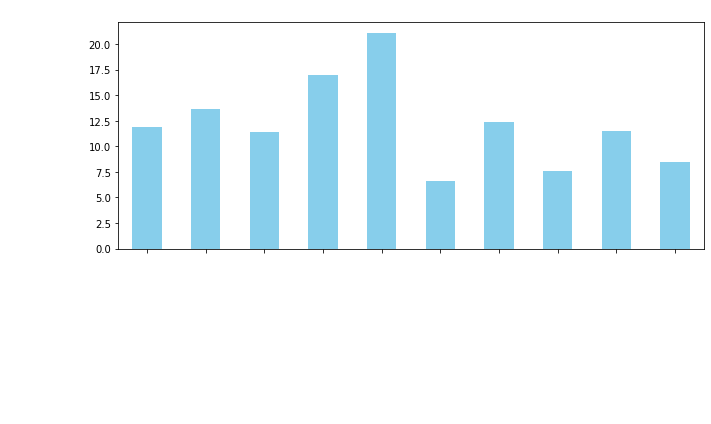

In [ ]:
import matplotlib.pyplot as plt
Faculty_Tenure = pd.DataFrame(really_final_df)

# Group by 'h1 tag' and calculate the average tenure for each group
average_tenure_per_faculty = really_final_df.groupby('Department')['Tenure'].mean()

# Display the result
print(average_tenure_per_faculty)

plt.figure(figsize=(10, 6))
average_tenure_per_faculty.plot(kind='bar', color='skyblue')
plt.title('Average Tenure per Department', color='white')
plt.xlabel('Faculty', color='white')
plt.ylabel('Average Tenure', color='white')
plt.xticks(rotation=45, ha='right', color='white') 
plt.tight_layout()
plt.show()

Rank
Faculty                    13.182927
Faculty Emeritus           27.409091
Instructor                  8.433333
MFA Fellow                  1.166667
Polyani Refugee Scholar     1.000000
Technician                  3.500000
Visiting Faculty            3.718750
Visitng Faculty             7.500000
Name: Tenure, dtype: float64


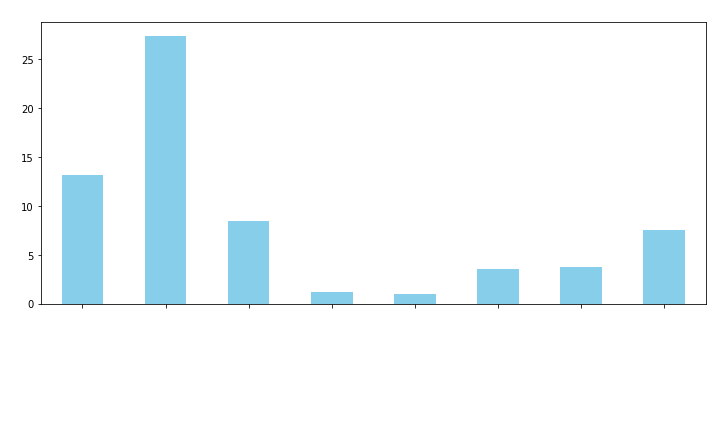

In [ ]:
Rank_Tenure = pd.DataFrame(really_final_df)

average_tenure_per_rank = really_final_df.groupby('Rank')['Tenure'].mean()

# Display the result
print(average_tenure_per_rank)

plt.figure(figsize=(10, 6))
average_tenure_per_rank.plot(kind='bar', color='skyblue')
plt.title('Average Tenure per Rank', color='white')
plt.xlabel('Rank', color='white')
plt.ylabel('Average Tenure', color='white')
plt.xticks(rotation=45, ha='right', color='white') 
plt.tight_layout()

# Display the plot in the notebook
plt.show()

We can also be a bit more detailed

Ranks
             Associate Dean of Pedagogy and Advising\n                                                                                 6.000000
             Associate Director, Center for the Advancement of Public Action\n                                                        11.500000
             Bass instructor\n                                                                                                        15.500000
             Ben Belitt Distinguished Visiting Faculty\n                                                                               0.500000
             Cello instructor\n                                                                                                       17.500000
             Dean of Faculty\n                                                                                                        15.500000
             Director and Curator of the Suzanne Lemberg Usdan Gallery\n                                                          

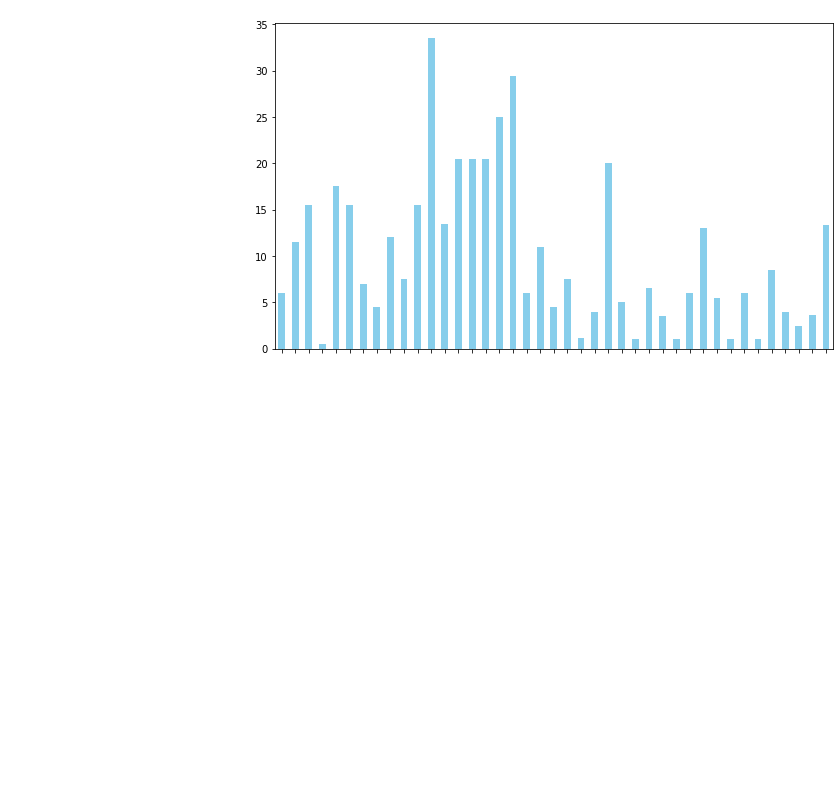

In [ ]:
Rank2_Tenure = pd.DataFrame(really_final_df)

average_tenure_per_rank = really_final_df.groupby('Ranks')['Tenure'].mean()

# Display the result
print(average_tenure_per_rank)

plt.figure(figsize=(10, 6))
average_tenure_per_rank.plot(kind='bar', color='skyblue')
plt.title('Average Tenure per Rank', color='white')
plt.xlabel('Rank', color='white')
plt.ylabel('Average Tenure', color='white')
plt.xticks(rotation=45, ha='right', color='white') 
plt.tight_layout()

# Display the plot in the notebook
plt.show()

This was really fun! I didn't expect so many hurdles along the way, really goes to show that the college should take better care of its archiving. Anyway, thank you for this challenge Michael! I really got to polish my skills and employ a couple of new ones in the process. 